In [139]:
# !pip install sklearn
# !pip install pydot
# !pip install pandas
!pip install imblearn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 163kB 36.3MB/s eta 0:00:01


In [38]:
import math

import numpy as np
import pandas as pd
import sklearn
from sklearn import tree
from sklearn import neural_network
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [39]:
sklearn.tree.DecisionTreeClassifier

sklearn.tree._classes.DecisionTreeClassifier

## 数据集加载

In [107]:
cancer_data = load_breast_cancer()
print(cancer_data.keys())

print(cancer_data.feature_names.shape, cancer_data.target_names.shape)

data_frame = pd.DataFrame(data=cancer_data.data, index=pd.RangeIndex(start=0, stop=569, step=1),
                             columns=cancer_data.feature_names)
data_target = pd.DataFrame(data=cancer_data.target, index=pd.RangeIndex(start=0, stop=569, step=1), columns=['target'])
all_data_frame = data_frame.join(data_target)
print(all_data_frame.shape)

all_data_frame

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(30,) (2,)
(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 数据可视化

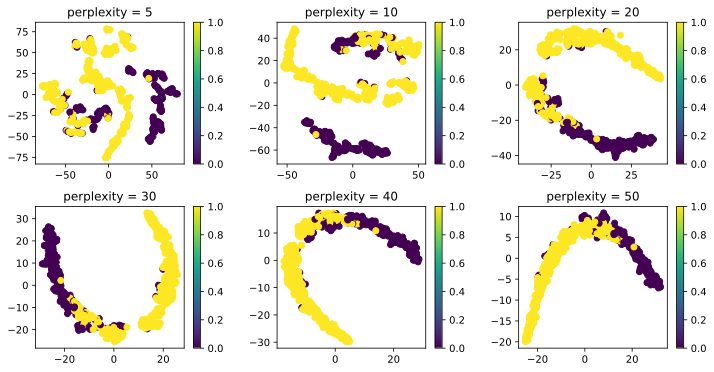

In [149]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

def draw_tsne(filename, data, target):
    f, axes = plt.subplots(2, 3, figsize=(12, 6))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    perplexity_values = [5, 10, 20, 30, 40, 50]
    for index, perplexity_value in enumerate(perplexity_values):
        tsne = TSNE(n_components=2, perplexity=perplexity_value)
        target_tsne = tsne.fit_transform(data)
        ax1 = axes[int(index / 3), index % 3].scatter(target_tsne[:, 0], target_tsne[:, 1], c=target)
        f.colorbar(ax1, ax=axes[int(index / 3), index % 3])
        axes[int(index / 3), index % 3].set_title('perplexity = ' + str(perplexity_value))

    filename = filename
    plt.savefig(filename)
    plt.show()
    
draw_tsne(r'./files/tsne_origin.png', cancer_data.data, cancer_data.target)

## 数据处理 - 数据平衡

In [145]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

print(Counter(cancer_data.target))

ros = RandomOverSampler(random_state=0)
dataset_data_os, dataset_target_os = ros.fit_sample(cancer_data.data, cancer_data.target)
print(Counter(dataset_target_os))

rus = RandomUnderSampler(random_state=0)
dataset_data_us, dataset_target_us = rus.fit_sample(cancer_data.data, cancer_data.target)
print(Counter(dataset_target_us))

Counter({1: 357, 0: 212})
Counter({0: 357, 1: 357})
Counter({0: 212, 1: 212})


Counter({0: 357, 1: 357})


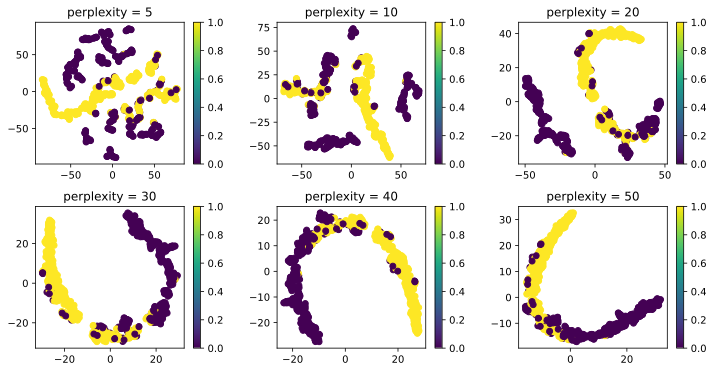

In [150]:
from imblearn.over_sampling import SMOTE
smo = SMOTE()
dataset_data_smo, dataset_target_smo = smo.fit_sample(cancer_data.data, cancer_data.target)
print(Counter(dataset_target_smo))
draw_tsne(r'./files/tsne_smo.png', dataset_data_smo, dataset_target_smo)

Counter({1: 311, 0: 308})


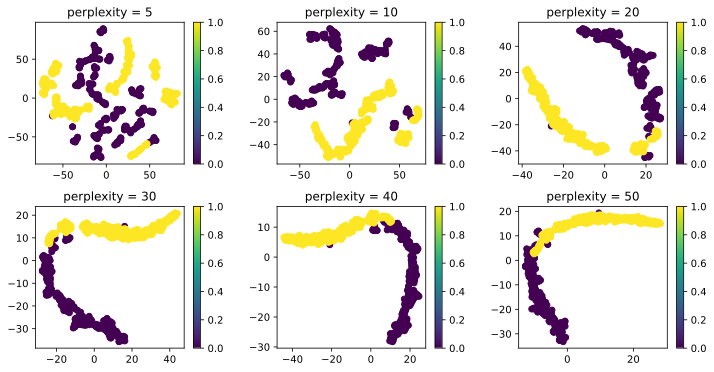

In [151]:
from imblearn.combine import SMOTEENN, SMOTETomek
smote_enn = SMOTEENN(random_state=10)
dataset_data_smo_enn, dataset_target_smo_enn = smote_enn.fit_sample(cancer_data.data, cancer_data.target)
print(Counter(dataset_target_smo_enn))
draw_tsne(r'./files/tsne_smo_enn.png', dataset_data_smo_enn, dataset_target_smo_enn)

Counter({1: 311, 0: 308})


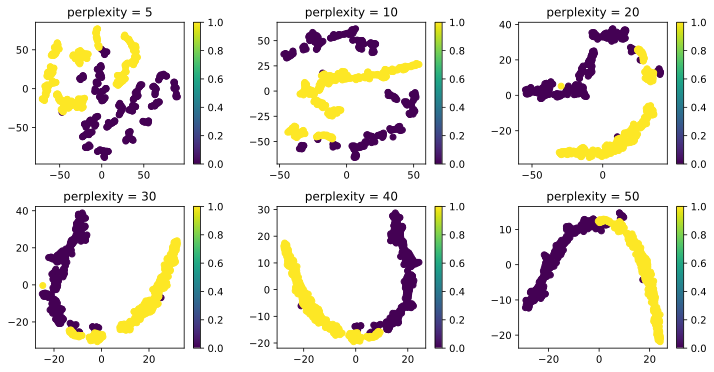

In [152]:
from imblearn.combine import SMOTEENN, SMOTETomek
smote_tetomek = SMOTETomek(random_state=10)
dataset_data_smo_tetomek, dataset_target_smo_tetomek = smote_enn.fit_sample(cancer_data.data, cancer_data.target)
print(Counter(dataset_target_smo_tetomek))
draw_tsne(r'./files/tsne_smo_tetomek.png', dataset_data_smo_tetomek, dataset_target_smo_tetomek)

## 数据处理 - 数据标准化

In [154]:
from sklearn import preprocessing
import numpy as np

dataset_data_scaled = preprocessing.scale(dataset_data_smo_enn)
print(dataset_data_scaled.mean(axis=0))
print(dataset_data_scaled.std(axis=0))

[-1.27487322e-15 -6.83388008e-15  3.25354534e-15 -7.62628158e-16
 -3.17319317e-15  6.49274208e-17 -3.79520504e-16  1.15721469e-15
 -5.64868561e-15  3.19973809e-15 -5.75961824e-16 -4.52967407e-16
 -4.70185728e-16  8.07108822e-17  1.05260442e-16 -2.09130864e-16
 -8.94635290e-16 -1.15793212e-15 -1.74514863e-16 -1.91464148e-16
  1.87213375e-15  3.73924550e-15 -3.08494928e-17 -1.52669118e-15
  1.62139195e-16  1.71429914e-15 -7.43974977e-16  1.98297670e-15
  1.48104469e-16  7.91863434e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


## 特征选择

In [160]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

classifier = SelectKBest(f_classif, k=10).fit(dataset_data_smo_enn, dataset_target_smo_enn)
mask = classifier.get_support()
X_new = classifier.transform(dataset_data_smo_enn)
features = all_data_frame.columns.values.tolist()[2:]
feature_new = []

for feature, boolean in zip(features, mask):
    if boolean:
        feature_new.append(feature)
print(feature_new)

['mean perimeter', 'mean smoothness', 'mean compactness', 'mean symmetry', 'mean fractal dimension', 'worst perimeter', 'worst smoothness', 'worst compactness', 'worst symmetry', 'worst fractal dimension']


## 生成训练集和测试集

In [161]:
# cancer_data['target']
x_train, x_test, y_train, y_test = train_test_split(dataset_data_smo_enn, dataset_target_smo_enn, test_size = 0.3)

## 自编决策树

In [8]:
def cal_shannon_ent(features_data, target_data):
    num_entries = len(features_data)
    label_counts = {}
    for each_label in target_data:
        if each_label not in label_counts:
            label_counts[each_label] = 0
        label_counts[each_label] += 1
    shannaon_ent = 0.0
    for each_label, each_count in label_counts.items():
        prob = each_count / num_entries
        shannaon_ent -= prob * math.log(prob, 2)
    return shannaon_ent

In [9]:
def split_dataset(features_data, feature_index, value):
    return_dataset = []
    old_num = len(features_data[0])
    for each_feature_data in features_data:
        if each_feature_data[feature_index] == value:
            reduced_feature_data = each_feature_data[:feature_index]
            other_reduced_feature_data = each_feature_data[feature_index + 1:]
            new_reduced_feature_data = np.concatenate((reduced_feature_data, other_reduced_feature_data))
            return_dataset.append(np.array(new_reduced_feature_data))
    if old_num - len(return_dataset[0]) != 1:
        print("aaaaaaaa", len(return_dataset[0]), old_num)
    return return_dataset

In [10]:
def choose_best_feature_to_split(features_data, target_data):
    num_features = len(features_data[0])
    base_entropy = cal_shannon_ent(features_data, target_data)
    best_info_gain = 0.0
    best_feature = -1
#     print('bbb', len(features_data[0]))
    
    for feature_index in range(num_features):
        each_feature_value_list = [each_feature_data[feature_index] for each_feature_data in features_data]
        each_feature_value_set = set(each_feature_value_list)
        new_entropy = 0.0
        for each_value in each_feature_value_set:
            sub_dataset = split_dataset(features_data, feature_index, each_value)
            prob = len(sub_dataset) / len(features_data)
            new_entropy += prob * cal_shannon_ent(sub_dataset, target_data)
            
        info_gain = base_entropy - new_entropy
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature = feature_index
#     print('ccc', len(features_data[0]))
    return best_feature

In [11]:
def create_decision_tree(features_data, target_data, feature_names, target_names):
    print("main a", len(feature_names), len(features_data[0]))
    best_feature_index = choose_best_feature_to_split(features_data, target_data)
    best_feature_name = feature_names[best_feature_index]
    
    decision_tree = {
        best_feature_name: {}
    }
    feature_names = np.delete(feature_names, np.argwhere(feature_names == best_feature_name))
    feature_values = [each_feature_data[best_feature_index] for each_feature_data in features_data]
    unique_values = set(feature_values)
    for each_value in unique_values:
        print('start', len(feature_names), decision_tree)
        print("main b", len(feature_names), len(features_data[0]))
        sub_labels = target_data[:]
        new_features_data = split_dataset(features_data, best_feature_index, each_value)
        print("main c", len(feature_names), len(features_data[0]), len(new_features_data[0]))
        decision_tree[best_feature_name][each_value] = create_decision_tree(new_features_data, sub_labels, feature_names, target_names)
        print('end', len(feature_names), decision_tree)
    print(best_feature_name)
    
    return decision_tree

my_decision_tree = create_decision_tree(x_train, y_train, cancer_data.feature_names, cancer_data.target_names)
print(my_decision_tree)

main a 30 30
start 29 {'smoothness error': {}}
main b 29 30
main c 29 30 29
main a 29 29
start 28 {'worst fractal dimension': {}}
main b 28 29
aaaaaaaa 57 29
main c 28 29 57
main a 28 57
start 27 {'worst symmetry': {}}
main b 27 57
aaaaaaaa 113 57
main c 27 57 113
main a 27 113
start 26 {'worst concave points': {}}
main b 26 113
aaaaaaaa 225 113
main c 26 113 225
main a 26 225
start 25 {'worst concavity': {}}
main b 25 225
aaaaaaaa 449 225
main c 25 225 449
main a 25 449
start 24 {'worst compactness': {}}
main b 24 449
aaaaaaaa 897 449
main c 24 449 897
main a 24 897
start 23 {'worst smoothness': {}}
main b 23 897
aaaaaaaa 1793 897
main c 23 897 1793
main a 23 1793
start 22 {'worst area': {}}
main b 22 1793
aaaaaaaa 3585 1793
main c 22 1793 3585
main a 22 3585
start 21 {'worst perimeter': {}}
main b 21 3585
aaaaaaaa 7169 3585
main c 21 3585 7169
main a 21 7169
start 20 {'worst texture': {}}
main b 20 7169
aaaaaaaa 14337 7169
main c 20 7169 14337
main a 20 14337
start 19 {'worst radius'

KeyboardInterrupt: 

## sklearn中决策树1

In [186]:
dataset_data = dataset_data_smo_enn
dataset_target = dataset_target_smo_enn

accuracy = []
split_list = []
depth_list = []
for depth in range(2, 6):
    for split in np.arange(0.1, 1.0, 0.1):
        current = []
        for r in range(40):
            x_train, x_test, y_train, y_test = train_test_split(dataset_data_smo_enn, dataset_target_smo_enn, test_size = split, random_state=10)
            clf = tree.DecisionTreeClassifier(max_depth=depth, criterion='entropy')
            clf.fit(x_train, y_train)
            ans = clf.predict(x_test)
            cnt = 0
            for index, y_test_value in enumerate(y_test):
                if y_test_value == ans[index]:
                    cnt += 1
            c = cnt / len(y_test)
            current.append(c)
        avg = np.average(current)
        split_list.append(split)
        depth_list.append(depth)
        accuracy.append(avg)
print("准确率", accuracy)

准确率 [0.967741935483871, 0.967741935483871, 0.9731182795698924, 0.9637096774193548, 0.9709677419354839, 0.975537634408602, 0.9758640552995391, 0.9798387096774194, 0.9655913978494624, 0.967741935483871, 0.9758064516129032, 0.9688172043010754, 0.9660282258064516, 0.9721774193548388, 0.9775537634408604, 0.9758064516129032, 0.9798387096774194, 0.9646953405017922, 0.967741935483871, 0.9758064516129032, 0.9669354838709678, 0.965625, 0.9718548387096775, 0.9747983870967742, 0.9758640552995391, 0.9798387096774194, 0.9668906810035842, 0.967741935483871, 0.9758064516129032, 0.9674731182795699, 0.9655241935483871, 0.9723387096774193, 0.977016129032258, 0.9759216589861751, 0.9798387096774194, 0.9633960573476703]


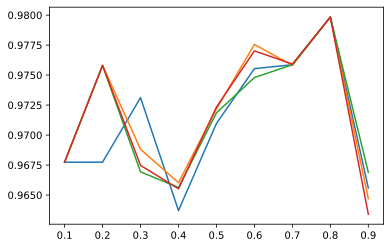

In [187]:
for i in range(4):
    plt.plot(split_list[i * 9: (i + 1) * 9], accuracy[i * 9: (i + 1) * 9])
# split_list
plt.show()

## sklearn中的决策树2

In [163]:
sklearn_decision_tree = tree.DecisionTreeClassifier()
sklearn_decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [164]:
sklearn_decision_tree.score(x_test, y_test)

0.9838709677419355

In [189]:
import os
import pydot

files_dir_path = './files'
if not os.path.exists(files_dir_path):
    os.mkdir(files_dir_path)
sklearn_tree_dot_file = 'tree.dot'
sklearn_tree_dot_file_path = os.path.join(files_dir_path, sklearn_tree_dot_file)
if not os.path.exists(sklearn_tree_dot_file_path):
    tree.export_graphviz(sklearn_decision_tree, out_file=sklearn_tree_dot_file_path, class_names=['严重','轻微'],feature_names=cancer_data.feature_names,impurity=False,filled=True)
# (graph, ) = pydot.graph_from_dot_file(sklearn_tree_dot_file_path)

# sklearn_tree_png_file = 'tree.png'
# sklearn_tree_png_file_path = os.path.join(files_dir_path, sklearn_tree_png_file)
# graph.write_png(sklearn_tree_png_file_path)